In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets download -d yugagrawal95/movie-data

  0% 0.00/2.85M [00:00<?, ?B/s]
100% 2.85M/2.85M [00:00<00:00, 162MB/s]


In [ ]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
!unzip movie-data.zip

Archive:  movie-data.zip
  inflating: movies.csv              
  inflating: ratings.csv             
  inflating: tags.csv                


In [ ]:
ratings = pd.read_csv('/content/ratings.csv', encoding="ISO-8859-1")
movies = pd.read_csv('/content/movies.csv', encoding="ISO-8859-1")
tags = pd.read_csv('/content/tags.csv', encoding="ISO-8859-1")
rate_and_movie = ratings.merge(movies, on='movieId')

In [ ]:
ratings.head()

,userId,movieId,rating,timestamp
0,12882,1,4.0,1147195252
1,12882,32,3.5,1147195307
2,12882,47,5.0,1147195343
3,12882,50,5.0,1147185499
4,12882,110,4.5,1147195239


In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
tags.head()

,movieId,userId,tag,timestamp
0,3916,12882,sports,1147195545
1,4085,12882,Eddie Murphy,1147195966
2,33660,12882,boxing,1147195514
3,1197,320,must show,1145964801
4,1396,320,must show,1145964810


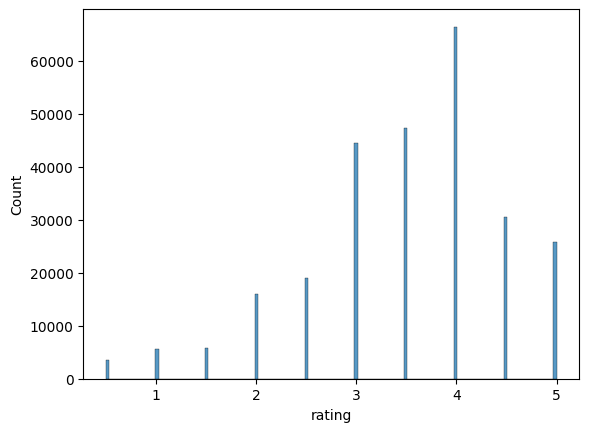

In [ ]:
sns.histplot(data=ratings['rating']);

In [ ]:
movie_rat_count = ratings.groupby('movieId')['rating'].count().rename('count rating')
movie_rat_sum = ratings.groupby('movieId')['rating'].sum().rename('sum rating')
movie_rat_mean = ratings.groupby('movieId')['rating'].mean().rename('mean rating')

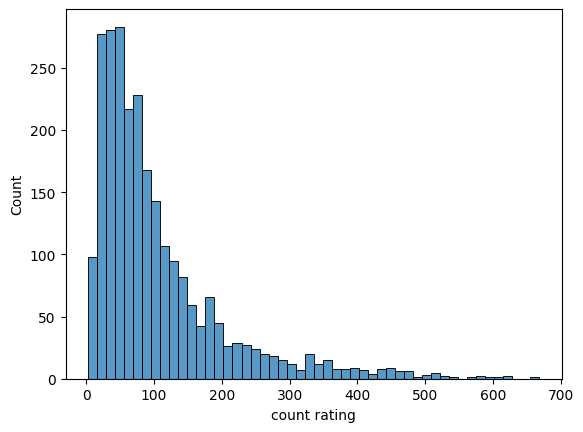

In [ ]:
sns.histplot(data=movie_rat_count);

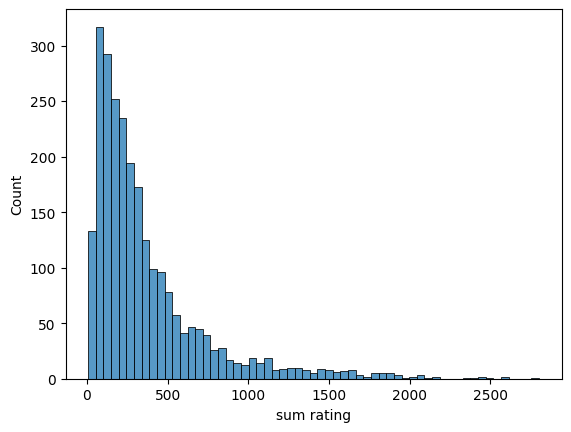

In [ ]:
sns.histplot(data=movie_rat_sum);

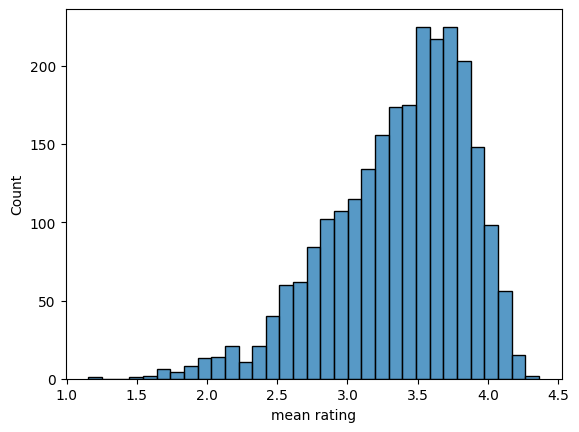

In [ ]:
sns.histplot(data=movie_rat_mean);

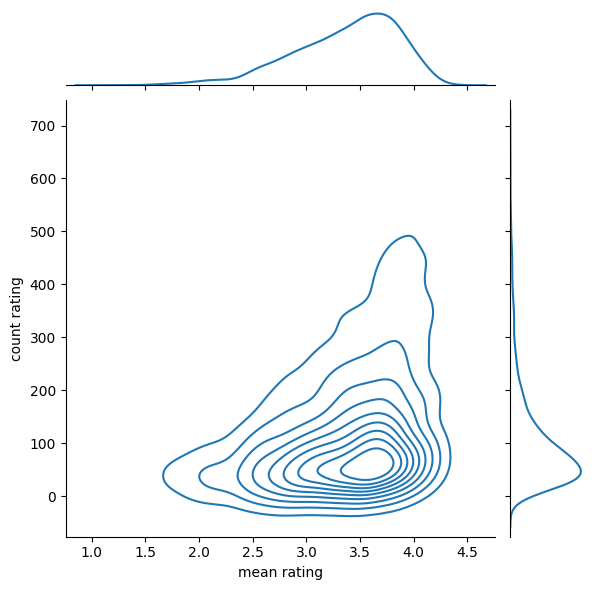

In [ ]:
sns.jointplot(x=movie_rat_mean, y=movie_rat_count, kind='kde');

In [ ]:
user_rat_count = ratings.groupby('userId')['rating'].count().rename('count rating')
user_rat_sum = ratings.groupby('userId')['rating'].sum().rename('sum rating')
user_rat_mean = ratings.groupby('userId')['rating'].mean().rename('mean rating')

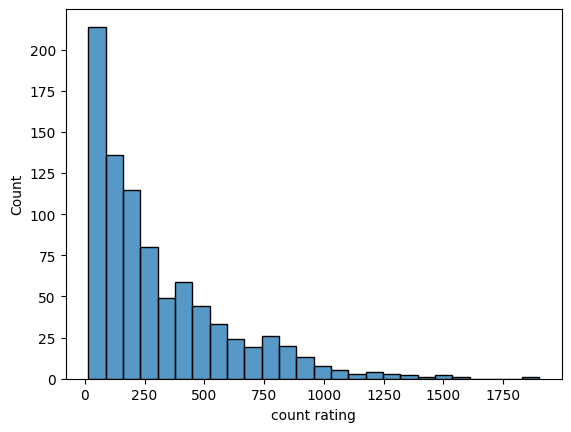

In [ ]:
sns.histplot(data=user_rat_count);

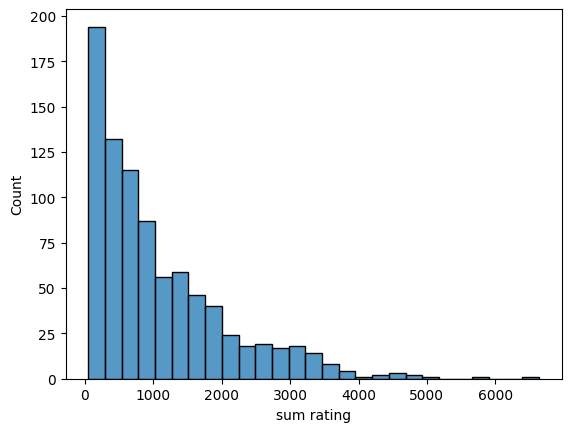

In [ ]:
sns.histplot(data=user_rat_sum);

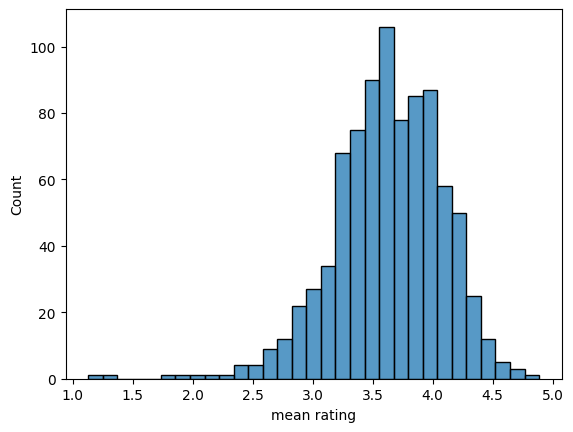

In [ ]:
sns.histplot(data=user_rat_mean);

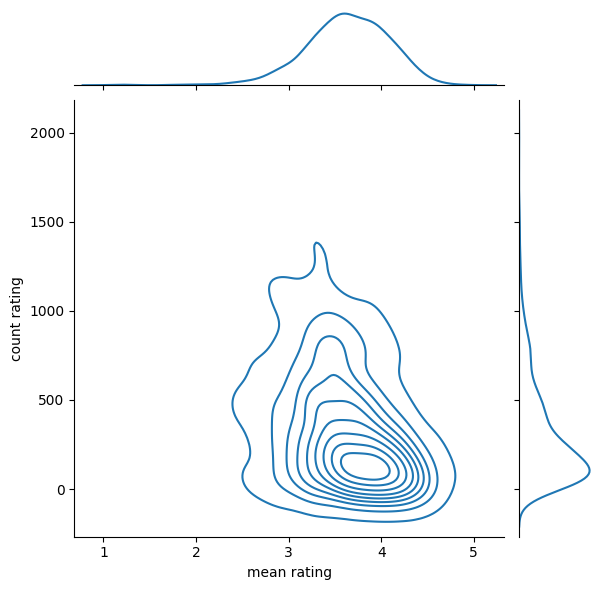

In [ ]:
sns.jointplot(x=user_rat_mean, y=user_rat_count, kind='kde');

In [ ]:
rating_matrix = ratings.pivot_table(index=['userId'], columns=['movieId'], values=['rating'], fill_value=0)
rating_matrix.columns = rating_matrix.columns.droplevel()
rating_matrix.head()

movieId,1,2,3,4,5,6,7,9,10,11,...,106487,106489,106782,106920,109374,109487,111362,111759,112556,112852
userId,,,,,,,,,,,,,,,,,,,,,
316,2.5,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
359,5.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
370,4.5,4.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,2.5,3.0,4.5,4.0,0.0,0.0,3.0,4.5,3.5,3.0
910,5.0,4.0,3.5,0.0,3.5,3.5,0.0,0.0,0.0,4.0,...,0.0,0.0,3.5,0.0,0.0,0.0,0.0,4.5,0.0,0.0


In [ ]:
user_similarity = pd.DataFrame(cosine_similarity(rating_matrix), index=rating_matrix.index, columns=rating_matrix.index)
user_similarity.head()

userId,316,320,359,370,910,975,1015,1387,1447,1588,...,137118,137209,137227,137446,137559,137609,137805,138072,138176,138200
userId,,,,,,,,,,,,,,,,,,,,,
316,1.000000,0.322623,0.306750,0.279642,0.257203,0.280873,0.300295,0.258089,0.027222,0.281348,...,0.349452,0.277497,0.061495,0.252885,0.395155,0.065220,0.339868,0.272711,0.033113,0.221263
320,0.322623,1.000000,0.235901,0.229883,0.212151,0.275432,0.200329,0.216800,0.000000,0.244246,...,0.269591,0.345835,0.140143,0.197291,0.295228,0.080637,0.239694,0.230069,0.048161,0.148214
359,0.306750,0.235901,1.000000,0.383413,0.420568,0.361007,0.348897,0.286183,0.099450,0.444715,...,0.413927,0.278658,0.078328,0.259655,0.281176,0.062386,0.394250,0.359641,0.085528,0.330077
370,0.279642,0.229883,0.383413,1.000000,0.339169,0.401655,0.250116,0.225223,0.122764,0.415751,...,0.392338,0.235509,0.141439,0.280356,0.282732,0.093079,0.391628,0.249811,0.075264,0.259580
910,0.257203,0.212151,0.420568,0.339169,1.000000,0.366910,0.337366,0.297520,0.080829,0.472176,...,0.369491,0.242415,0.068843,0.286017,0.250674,0.032906,0.353549,0.285821,0.094551,0.317473


In [ ]:
movie_similarity = pd.DataFrame(cosine_similarity(rating_matrix.T), index=rating_matrix.columns, columns=rating_matrix.columns)
movie_similarity.head()

movieId,1,2,3,4,5,6,7,9,10,11,...,106487,106489,106782,106920,109374,109487,111362,111759,112556,112852
movieId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.625929,0.336993,0.139868,0.346502,0.473807,0.344387,0.152398,0.531821,0.414788,...,0.313226,0.246531,0.320486,0.306480,0.299759,0.253932,0.272649,0.300369,0.256566,0.303656
2,0.625929,1.000000,0.341933,0.100731,0.335153,0.427775,0.257025,0.221215,0.521792,0.377452,...,0.263075,0.205877,0.275469,0.229950,0.204283,0.187325,0.228778,0.244541,0.175515,0.227478
3,0.336993,0.341933,1.000000,0.127242,0.427683,0.322007,0.286550,0.153426,0.363649,0.419529,...,0.167822,0.130032,0.195695,0.141547,0.132344,0.156030,0.170912,0.199334,0.148353,0.179938
4,0.139868,0.100731,0.127242,1.000000,0.159490,0.118601,0.153334,0.073342,0.080472,0.239746,...,0.122320,0.036663,0.026979,0.000000,0.068410,0.031962,0.072040,0.067858,0.045796,0.110380
5,0.346502,0.335153,0.427683,0.159490,1.000000,0.282674,0.370333,0.216384,0.273099,0.455918,...,0.143614,0.099106,0.140778,0.091009,0.126970,0.073840,0.071147,0.114885,0.086782,0.102243


In [ ]:
# # product based (item-wise)
# users_recom = []
# for user_id in tqdm(rating_matrix.index):
#   movies_recom = []
#   for movie_id in rating_matrix.columns:
#     curr_movie = movie_similarity.loc[movie_id]
#     sum_rate = np.abs(curr_movie.sum())
#     weighted_rate = (np.dot(rating_matrix.loc[user_id], curr_movie))/sum_rate
#     movies_recom.append(weighted_rate)
#   users_recom.append(movies_recom)

In [ ]:
# user based (user-wise)
users_recom = []
for user_id in tqdm(user_similarity.index):
  curr_user = user_similarity.loc[user_id]
  sum_similarity = np.abs(curr_user.sum())
  movies_recom = []
  for movie_id in rating_matrix.columns:
    other_users_rate = rating_matrix.loc[:, movie_id]
    weighted_rate = (np.dot(other_users_rate, curr_user))/sum_similarity
    movies_recom.append(weighted_rate)
  users_recom.append(movies_recom)

  0%|          | 0/862 [00:00<?, ?it/s]

In [ ]:
users_recom_df = pd.DataFrame(users_recom)
users_recom_df.index = rating_matrix.index
users_recom_df.columns = rating_matrix.columns
users_recom_df = users_recom_df.T
users_recom_df.head()

userId,316,320,359,370,910,975,1015,1387,1447,1588,...,137118,137209,137227,137446,137559,137609,137805,138072,138176,138200
movieId,,,,,,,,,,,,,,,,,,,,,
1,2.542725,2.372522,2.601423,2.526288,2.640068,2.453241,2.602424,2.573930,2.537336,2.577605,...,2.529948,2.541835,2.469061,2.424756,2.463237,2.444154,2.637009,2.624436,2.228162,2.558016
2,1.230883,1.093896,1.291318,1.234978,1.304806,1.174585,1.325402,1.222722,1.072853,1.249557,...,1.220684,1.235123,1.173949,1.198204,1.171669,1.177778,1.298912,1.310826,0.969926,1.320918
3,0.322143,0.284559,0.380547,0.321544,0.396855,0.323442,0.366034,0.329785,0.286077,0.357713,...,0.342104,0.317653,0.270049,0.322188,0.303861,0.348835,0.347717,0.402453,0.292911,0.357537
4,0.038896,0.035595,0.050537,0.041537,0.053120,0.041886,0.046638,0.045836,0.035583,0.048350,...,0.047875,0.044457,0.035278,0.036837,0.034674,0.056081,0.049733,0.053743,0.033945,0.048214
5,0.294632,0.264446,0.350367,0.290753,0.368964,0.294161,0.368619,0.319970,0.261593,0.329932,...,0.322925,0.300038,0.238622,0.288616,0.280365,0.348966,0.321929,0.371697,0.263979,0.342519


In [ ]:
def recomm(user_id):
  all_rates = users_recom_df[[user_id]].sort_values(by=user_id, ascending=False)
  recommendations = {}
  for movie_id in rating_matrix.columns:
    if rating_matrix.loc[user_id, movie_id] == 0:
      recommendations[movie_id] = all_rates.loc[movie_id, user_id]
  recommendations = dict(sorted(recommendations.items(), key=lambda item: item[1]))
  for movie_id in list(recommendations.keys())[-10:]:
    recom = rate_and_movie[rate_and_movie['movieId']==movie_id]
    movie = list(set(recom['title']))[0]
    genre = list(set(recom['genres']))[0]
    rate = recommendations[movie_id]
    print(f'Recommended movie: {movie}, in genre: {genre}, with estimated rate: {round(rate, 2)}')

In [ ]:
user_ids = [359, 910, 138072]
for user_id in user_ids:
  recomm(user_id)
  print('*'*100)

Recommended movie: Pan's Labyrinth (Laberinto del fauno, El) (2006), in genre: Drama|Fantasy|Thriller, with estimated rate: 1.87
Recommended movie: WALL·E (2008), in genre: Adventure|Animation|Children|Romance|Sci-Fi, with estimated rate: 1.87
Recommended movie: Goodfellas (1990), in genre: Crime|Drama, with estimated rate: 1.96
Recommended movie: Edward Scissorhands (1990), in genre: Drama|Fantasy|Romance, with estimated rate: 2.01
Recommended movie: Lion King, The (1994), in genre: Adventure|Animation|Children|Drama|Musical|IMAX, with estimated rate: 2.1
Recommended movie: Titanic (1997), in genre: Drama|Romance, with estimated rate: 2.14
Recommended movie: Catch Me If You Can (2002), in genre: Crime|Drama, with estimated rate: 2.15
Recommended movie: One Flew Over the Cuckoo's Nest (1975), in genre: Drama, with estimated rate: 2.16
Recommended movie: Ocean's Eleven (2001), in genre: Crime|Thriller, with estimated rate: 2.36
Recommended movie: Monty Python and the Holy Grail (1975), 

## Another Method

In [ ]:
!pip install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 KB 16.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp39-cp39-linux_x86_64.whl size=3193614 sha256=2d61a0d92d38e3ead758a24160c71cc12f03423a2a6a1d8cf1b05b0227f64f88
  Stored in directory: /root/.cache/pip/wheels/c6/3a/46/9b17b3512bdf283c6cb84f59929cdd5199d4e754d596d22784
Successfully built scikit-surprise


In [ ]:
from surprise import SVD
from surprise import accuracy
from surprise import KNNWithMeans
from surprise.reader import Reader
from surprise.dataset import Dataset
from surprise.model_selection import train_test_split, RandomizedSearchCV

In [ ]:
reader = Reader()
surprise_data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(surprise_data)

In [ ]:
class RecommenderSystem():
  def __init__(self, model, trainset, testset, rating_matrix, rate_and_movie):
    self.model = model
    self.trainset = trainset
    self.testset = testset
    self.rating_matrix  = rating_matrix
    self.rate_and_movie = rate_and_movie
  def fit(self):
    self.model.fit(self.trainset)
  def rmse(self):
    pred = self.model.test(self.testset)
    rmse = round(accuracy.rmse(pred), 3)
  def recommend(self, userid):
    recommendations = {}
    for itemid in self.rating_matrix.columns:
      if rating_matrix.loc[userid, itemid] == 0:
        recommendations[itemid] = self.model.predict(userid, itemid)[3]
    recommendations = dict(sorted(recommendations.items(), key=lambda item: item[1], reverse=True))

    movie = []
    genre = []
    est_rate = []
    self.recommendations_df = pd.DataFrame()

    for movie_id in list(recommendations.keys())[:10]:
      recom = self.rate_and_movie[self.rate_and_movie['movieId']==movie_id]
      movie.append(list(set(recom['title']))[0])
      genre.append(list(set(recom['genres']))[0])
      est_rate.append(recommendations[movie_id])

    self.recommendations_df['userId'] = [userid for i in range(len(movie))]
    self.recommendations_df['title'] =  movie
    self.recommendations_df['genres'] = genre
    self.recommendations_df['est_rate'] = est_rate

    display(self.recommendations_df)

In [ ]:
sim_options = {"name": ["msd", "cosine", "pearson", "pearson_baseline"], "min_support": [3, 4, 5], "user_based": [True]}
params = {'k': range(30,50,1), 'sim_options': sim_options}
clf = RandomizedSearchCV(KNNWithMeans, params, n_jobs=-1, measures=['rmse'])
clf.fit(surprise_data)

In [ ]:
model = clf.best_estimator['rmse']
recomm_system = RecommenderSystem(model, trainset, testset, rating_matrix, rate_and_movie)
recomm_system.fit()

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [ ]:
recomm_system.rmse()

RMSE: 0.7863


In [ ]:
userids = [359, 910, 138072]
for userid in userids:
  recomm_system.recommend(userid)
  print('\n')

,userId,title,genres,est_rate
0,359,Vanya on 42nd Street (1994),Drama,5.000000
1,359,"Last Supper, The (1995)",Drama|Thriller,4.888389
2,359,Stalker (1979),Drama|Mystery|Sci-Fi,4.702463
3,359,"Best Years of Our Lives, The (1946)",Drama|War,4.524117
4,359,12 Angry Men (1957),Drama,4.523006
5,359,Stop Making Sense (1984),Documentary|Musical,4.500892
6,359,Once Upon a Time in the West (C'era una volta ...,Action|Drama|Western,4.476415
7,359,How the Grinch Stole Christmas! (1966),Animation|Comedy|Fantasy|Musical,4.476137
8,359,Top Hat (1935),Comedy|Musical|Romance,4.439656
9,359,Solaris (Solyaris) (1972),Drama|Mystery|Sci-Fi,4.411633


,userId,title,genres,est_rate
0,910,Herbie Rides Again (1974),Adventure|Children|Comedy,4.891226
1,910,Othello (1995),Drama,4.889425
2,910,Stalker (1979),Drama|Mystery|Sci-Fi,4.852296
3,910,Cabaret (1972),Drama|Musical,4.684631
4,910,Vanya on 42nd Street (1994),Drama,4.663832
5,910,Koyaanisqatsi (a.k.a. Koyaanisqatsi: Life Out ...,Documentary,4.658574
6,910,"Searchers, The (1956)",Drama|Western,4.656820
7,910,12 Angry Men (1957),Drama,4.649021
8,910,Shane (1953),Drama|Western,4.648058
9,910,Jean de Florette (1986),Drama|Mystery,4.633945


,userId,title,genres,est_rate
0,138072,"Queen Margot (Reine Margot, La) (1994)",Drama|Romance,3.597816
1,138072,Naked (1993),Drama,3.550915
2,138072,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),Drama|Film-Noir|Romance,3.476829
3,138072,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,3.463451
4,138072,Rear Window (1954),Mystery|Thriller,3.461443
5,138072,All That Jazz (1979),Drama|Fantasy|Musical,3.444754
6,138072,"400 Blows, The (Les quatre cents coups) (1959)",Crime|Drama,3.430377
7,138072,"Clockwork Orange, A (1971)",Crime|Drama|Sci-Fi|Thriller,3.428625
8,138072,Atlantic City (1980),Crime|Drama|Romance,3.419808
9,138072,"Good, the Bad and the Ugly, The (Buono, il bru...",Action|Adventure|Western,3.418178


In [ ]:
params= {"n_epochs": [5, 10, 15, 20], "lr_all": [0.002, 0.005], "reg_all": [0.4, 0.6]}
clf = RandomizedSearchCV(SVD, params, n_jobs=-1, measures=['rmse'])
clf.fit(surprise_data)

In [ ]:
model = clf.best_estimator['rmse']
recomm_system = RecommenderSystem(model, trainset, testset, rating_matrix, rate_and_movie)
recomm_system.fit()

In [ ]:
recomm_system.rmse()

RMSE: 0.8310


In [ ]:
userids = [359, 910, 138072]
for userid in userids:
  recomm_system.recommend(userid)
  print('\n')

,userId,title,genres,est_rate
0,359,12 Angry Men (1957),Drama,4.142618
1,359,Rear Window (1954),Mystery|Thriller,4.095657
2,359,Battlestar Galactica (2003),Drama|Sci-Fi|War,4.084785
3,359,North by Northwest (1959),Action|Adventure|Mystery|Romance|Thriller,4.081892
4,359,Once Upon a Time in the West (C'era una volta ...,Action|Drama|Western,4.076832
5,359,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),Drama|Film-Noir|Romance,4.072267
6,359,"Sting, The (1973)",Comedy|Crime,4.070719
7,359,Double Indemnity (1944),Crime|Drama|Film-Noir,4.058966
8,359,Mr. Smith Goes to Washington (1939),Drama,4.049504
9,359,Stalker (1979),Drama|Mystery|Sci-Fi,4.048422


,userId,title,genres,est_rate
0,910,Seven Samurai (Shichinin no samurai) (1954),Action|Adventure|Drama,4.272732
1,910,12 Angry Men (1957),Drama,4.266633
2,910,Band of Brothers (2001),Action|Drama|War,4.261676
3,910,City of God (Cidade de Deus) (2002),Action|Adventure|Crime|Drama|Thriller,4.252109
4,910,Memento (2000),Mystery|Thriller,4.237800
5,910,Dr. Horrible's Sing-Along Blog (2008),Comedy|Drama|Musical|Sci-Fi,4.235978
6,910,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,4.228691
7,910,My Neighbor Totoro (Tonari no Totoro) (1988),Animation|Children|Drama|Fantasy,4.212656
8,910,Battlestar Galactica (2003),Drama|Sci-Fi|War,4.210939
9,910,Nausicaä of the Valley of the Wind (Kaze no ta...,Adventure|Animation|Drama|Fantasy|Sci-Fi,4.210199


,userId,title,genres,est_rate
0,138072,Band of Brothers (2001),Action|Drama|War,3.355269
1,138072,City of God (Cidade de Deus) (2002),Action|Adventure|Crime|Drama|Thriller,3.343102
2,138072,"Amelie (Fabuleux destin d'Amélie Poulain, Le) ...",Comedy|Romance,3.337194
3,138072,Memento (2000),Mystery|Thriller,3.328237
4,138072,Dr. Horrible's Sing-Along Blog (2008),Comedy|Drama|Musical|Sci-Fi,3.324907
5,138072,Rear Window (1954),Mystery|Thriller,3.310915
6,138072,Battlestar Galactica (2003),Drama|Sci-Fi|War,3.302623
7,138072,My Neighbor Totoro (Tonari no Totoro) (1988),Animation|Children|Drama|Fantasy,3.300666
8,138072,Nausicaä of the Valley of the Wind (Kaze no ta...,Adventure|Animation|Drama|Fantasy|Sci-Fi,3.296954
9,138072,North by Northwest (1959),Action|Adventure|Mystery|Romance|Thriller,3.293933
